In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Vasanth\Herat disease\heart.csv')

In [3]:

data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
## Checking missing vaulues
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
## Checking any duplicate values

data_dup = data.duplicated().any()

In [6]:
data_dup

True

In [7]:
data = data.drop_duplicates()

In [8]:
data_dup = data.duplicated().any()

In [9]:
data_dup

False

Succefully removed duplicates.

In [10]:
## Data Processing

cate_val =[]
num_val = []

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        num_val.append(column)


In [11]:
cate_val


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
num_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Encoding of categorical value

In [13]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [15]:
data.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0


In [16]:
cate_val.remove('sex')
cate_val.remove('target')

In [17]:
data =pd.get_dummies(data,columns=cate_val,drop_first =True)

In [18]:
data = data.astype(int)

In [19]:
data.head(4)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


Fetaure scaling

In [20]:
num_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[num_val]= sc.fit_transform(data[num_val])


In [22]:
data.head(4)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,0.216620,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,2.085738,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.151179,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.717939,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [23]:
X =data.drop('target',axis=1)

In [24]:
y = data['target']

In [25]:
## Train & split data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int32

In [27]:
## Logistic regression

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_predict = lg.predict(X_test)

In [28]:
y_predict

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.7868852459016393

Support vector classifier

In [30]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)
y_predict1 = svm.predict(X_test)


In [31]:
accuracy_score(y_test,y_predict1)

0.8032786885245902

 KNeighbors Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [33]:
y_predict2 = knn.predict(X_test)

In [34]:
accuracy_score(y_test,y_predict2)

0.7377049180327869

In [35]:
Score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    Score.append(accuracy_score(y_test,y_pred))

In [36]:
Score

[0.7377049180327869,
 0.7868852459016393,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7868852459016393,
 0.7377049180327869,
 0.7868852459016393,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7377049180327869,
 0.8032786885245902,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7213114754098361,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7049180327868853,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361]

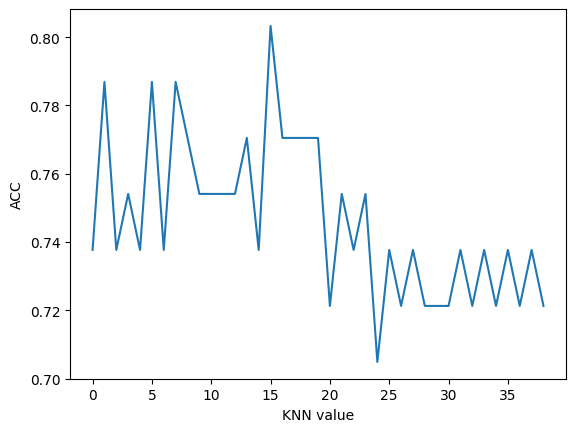

In [37]:
plt.plot(Score)
plt.xlabel("KNN value")
plt.ylabel("ACC")
plt.show()

In [38]:
knn=KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

In [54]:
final_data = pd.DataFrame({'Models':['Lg','svm','knn'],
                           'ACC':[accuracy_score(y_test,y_predict)*100,
                                  accuracy_score(y_test,y_predict1)*100,
                                  accuracy_score(y_test,y_predict2)*100,]})

In [55]:
final_data

,Models,ACC
0,Lg,78.688525
1,svm,80.327869
2,knn,73.770492


<Axes: xlabel='Models', ylabel='ACC'>

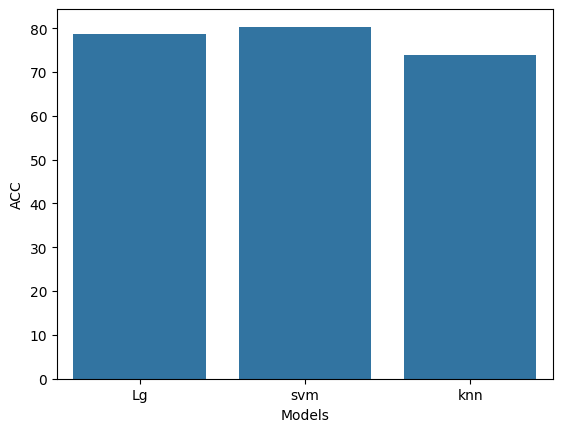

In [56]:
sns.barplot(x='Models', y='ACC', data=final_data)

In [63]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [64]:
## Save model using joblib

import joblib
joblib.dump(svm,'heart_predict')


['heart_predict']

In [65]:
## Load the model to use new data

model = joblib.load('heart_predict')
model.predict(new_data)